# Machine Learning Image Recongition
### Using Images of Simpsons Characters
#### Mark Carravallah

## Importing Data

In [229]:
from PIL import Image
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models

In [309]:
image_train = []  # X_train
image_test = []   # X_test
labels_train = [] # y_train
labels_test = []  # y_test
# keep confusing myself and need a reminder of the names

folder_names_train = np.array(['bart_simpson_train', 'krusty_the_clown_train', 'charles_montgomery_burns_train', 
                              'homer_simpson_train', 'lisa_simpson_train', 'marge_simpson_train',
                              'milhouse_van_houten_train', 'moe_szyslak_train', 'ned_flanders_train'])
folder_names_test = np.array(['bart_simpson_test', 'krusty_the_clown_test', 'charles_montgomery_burns_test', 
                              'homer_simpson_test', 'lisa_simpson_test', 'marge_simpson_test',
                              'milhouse_van_houten_test', 'moe_szyslak_test', 'ned_flanders_test'])

In [310]:
imageG_train = []
imageG_test = []
labelG_train = []
labelG_test = []

gray_train = np.array(['bart_simpson_train_gray', 'krusty_the_clown_train_gray', 'charles_montgomery_burns_train_gray', 
                              'homer_simpson_train_gray', 'lisa_simpson_train_gray', 'marge_simpson_train_gray',
                              'milhouse_van_houten_train_gray', 'moe_szyslak_train_gray', 'ned_flanders_train_gray'])
gray_test = np.array(['bart_simpson_test_gray', 'krusty_the_clown_test_gray', 'charles_montgomery_burns_test_gray', 
                              'homer_simpson_test_gray', 'lisa_simpson_test_gray', 'marge_simpson_test_gray',
                              'milhouse_van_houten_test_gray', 'moe_szyslak_test_gray', 'ned_flanders_test_gray'])

In [311]:
for name in folder_names_train:
    for filename in glob.glob("./{}/*.jpg".format(name)):
        im=Image.open(filename).resize((64, 64))
        image_train.append(im)
        labels_train.append(name)

In [312]:
for name_test in folder_names_test:
    for filename_test in glob.glob("./{}/*.jpg".format(name_test)):
        im_test=Image.open(filename_test).resize((64, 64))
        image_test.append(im_test)
        labels_test.append(name_test)

In [313]:
for name_gray in gray_train:
    for filename_gray in glob.glob("./{}/*.jpg".format(name_gray)):
        im_gray=Image.open(filename_gray).resize((64, 64))
        imageG_train.append(im_gray)
        labelG_train.append(name_gray)

In [314]:
for name_test_gray in gray_test:
    for filename_test_gray in glob.glob("./{}/*.jpg".format(name_test_gray)):
        im_test_gray=Image.open(filename_test_gray).resize((64, 64))
        imageG_test.append(im_test_gray)
        labelG_test.append(name_test_gray)

# EDA

In [315]:
labels_test

['bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_simpson_test',
 'bart_sim

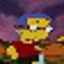

In [318]:
image_train[5000]

In [319]:
labels_train[5000]

'milhouse_van_houten_train'

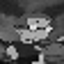

In [271]:
imageG_train[5000]

In [320]:
pd.unique(labels_train)

array(['bart_simpson_train', 'krusty_the_clown_train',
       'charles_montgomery_burns_train', 'homer_simpson_train',
       'lisa_simpson_train', 'marge_simpson_train',
       'milhouse_van_houten_train', 'moe_szyslak_train',
       'ned_flanders_train'], dtype=object)

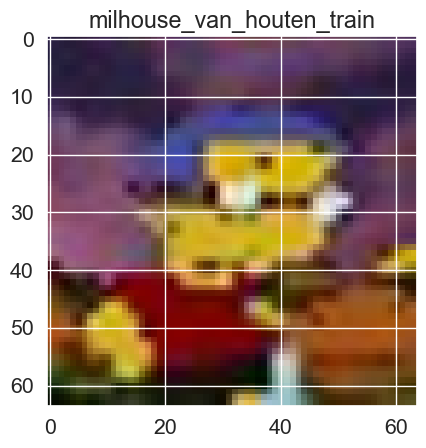

In [321]:
plt.imshow(image_train[5000])
plt.title(labels_train[5000])
plt.show()

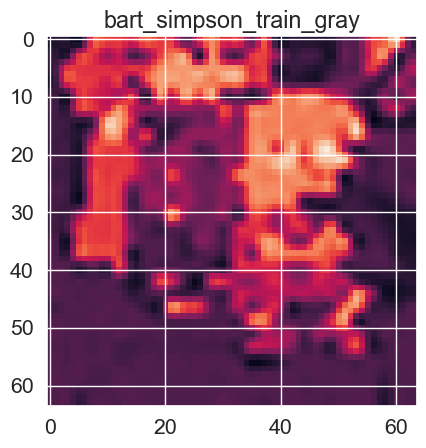

In [323]:
plt.imshow(imageG_train[200])
plt.title(labelG_train[200])
plt.show()

In [325]:
labels = pd.factorize(labels_train)[0]
print(labels)

[0 0 0 ... 8 8 8]


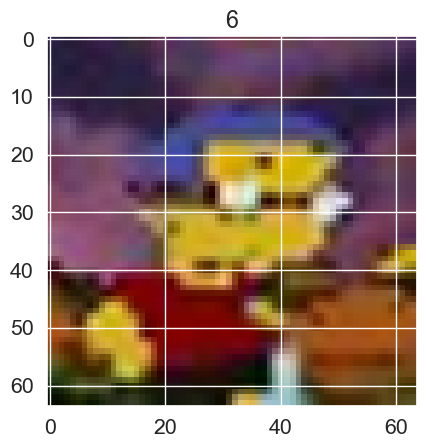

In [326]:
plt.imshow(image_train[5000])
plt.title(labels[5000])
plt.show()

In [329]:
image_train

[<PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB s

In [327]:
len(image_train)

7200

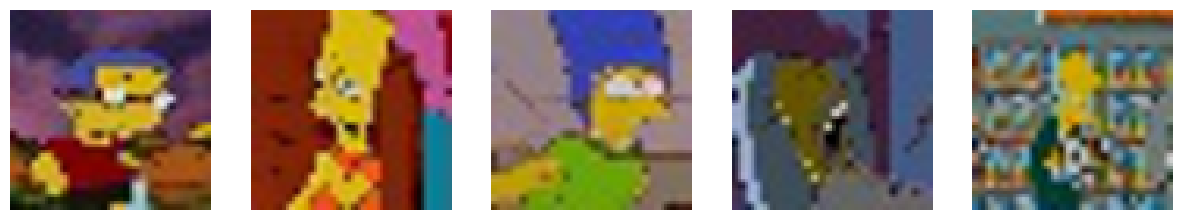

In [330]:
# create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

# plot images
axes[0].imshow(image_train[5000])
axes[0].axis('off')

axes[1].imshow(image_train[750])
axes[1].axis('off')

axes[2].imshow(image_train[4000])
axes[2].axis('off')

axes[3].imshow(image_train[3000])
axes[3].axis('off')

axes[4].imshow(image_train[2000])
axes[4].axis('off')

# show the plot
plt.show()

In [331]:
class_names = ['bart_simpson', 'charles_montgomery_burns', 'homer_simpson', 'krusty_the_clown',
               'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders']

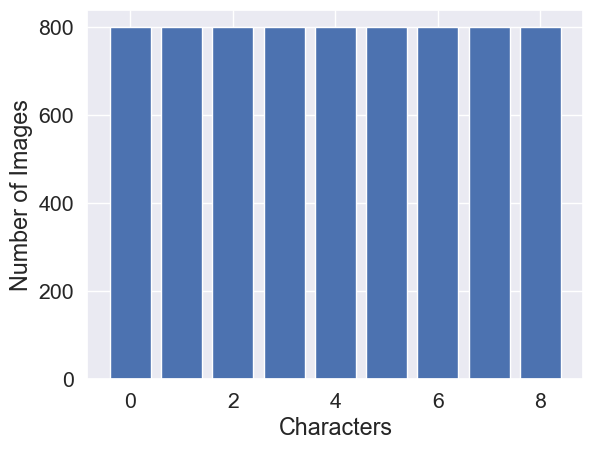

In [332]:
from collections import Counter

counts = Counter(labels)

counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

values, frequencies = zip(*counts)


plt.bar(values, frequencies)
plt.xlabel('Characters')
plt.ylabel('Number of Images')
plt.show()

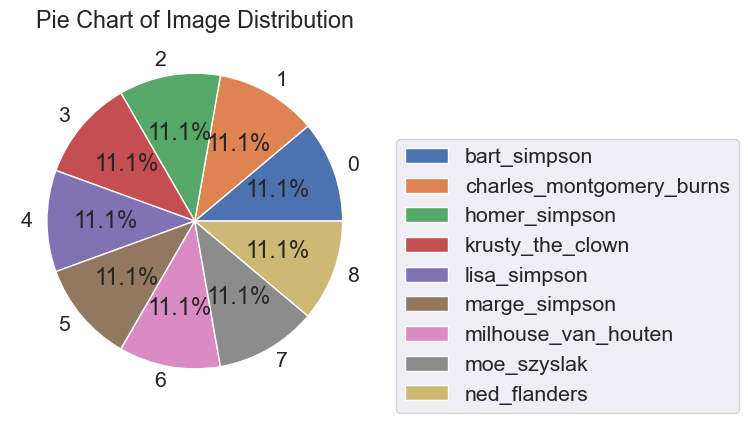

In [336]:
fig, ax = plt.subplots()
ax.pie(frequencies, labels=values, autopct='%1.1f%%')

plt.legend(class_names, bbox_to_anchor=(2, 0.75), loc="upper right")
plt.title('Pie Chart of Image Distribution')
plt.show()

In [56]:
# Flatten the image data into a 1D array
image_train_flat = np.array([np.asarray(image).flatten() for image in image_train])
image_test_flat = np.array([np.asarray(image).flatten() for image in image_test])

# Model Selection/Testing

### KNearest Neighbors (KNN)

In [57]:
# Define the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(image_train_flat, labels_train)

# Make predictions on the test data
predictions = knn.predict(image_test_flat)

# Print the predictions
print(predictions)

['bart_simpson_train' 'charles_montgomery_burns_train'
 'bart_simpson_train' ... 'ned_flanders_train' 'ned_flanders_train'
 'ned_flanders_train']


C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


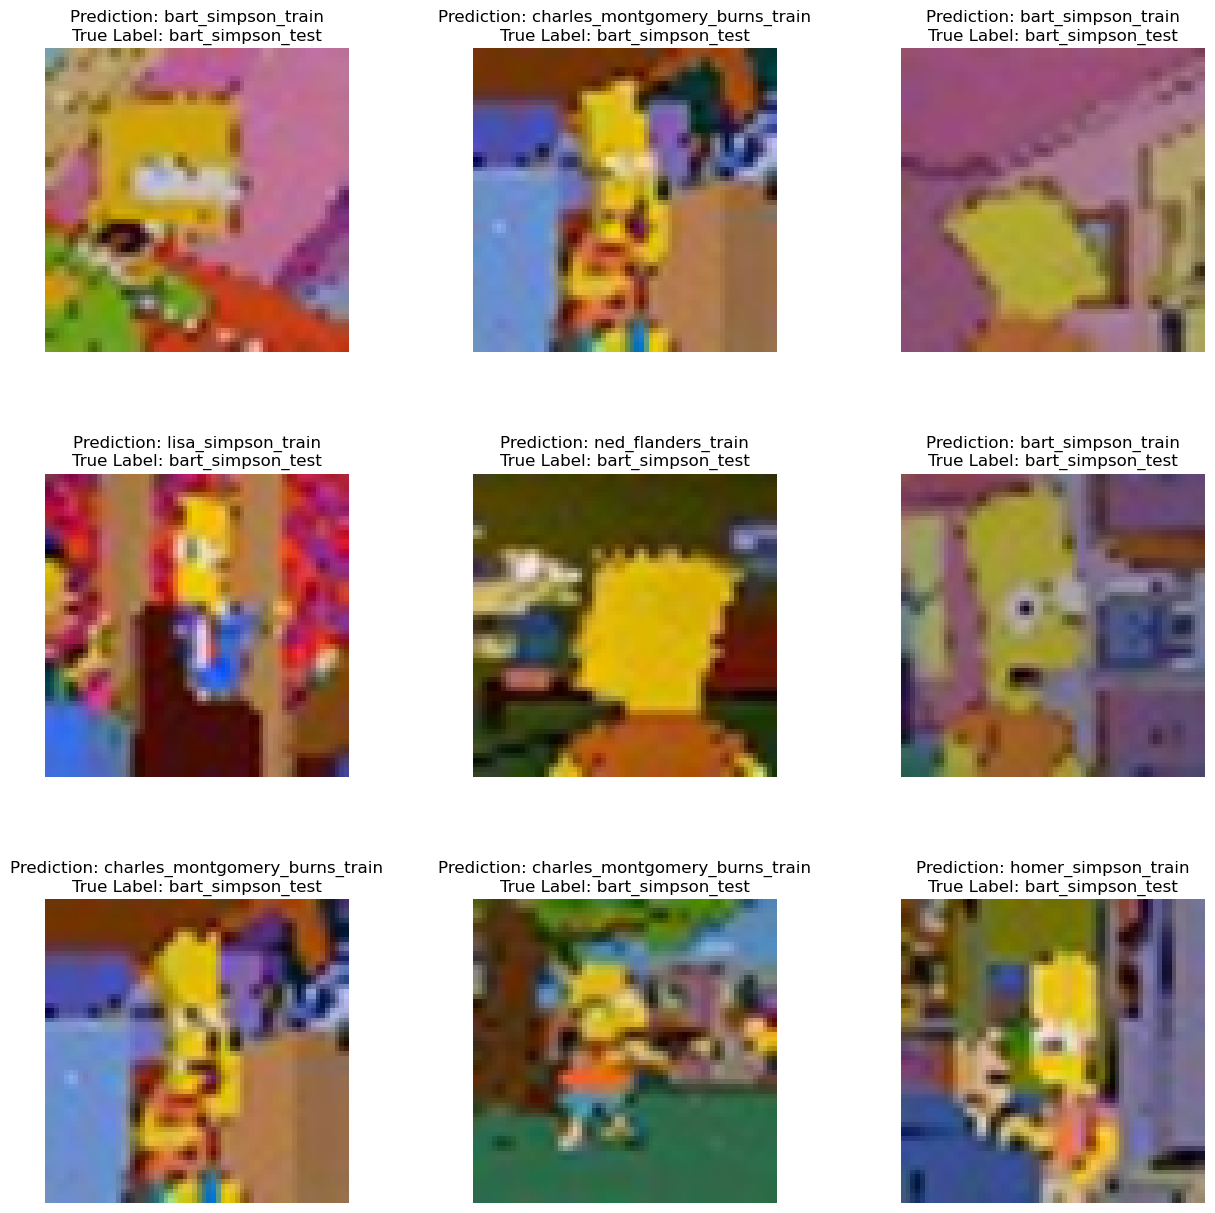

In [58]:
# Plot the images with their predicted labels
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axs.flat):
    ax.imshow(image_test[i])
    ax.set_title(f"Prediction: {predictions[i]}\nTrue Label: {labels_test[i]}")
    ax.axis('off')

plt.show()

In [60]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(labels_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.0


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(image_train_flat, labels_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy Score: ", grid_search.best_score_)

C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Parameters:  {'n_neighbors': 1}
Accuracy Score:  0.4259722222222223


C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Stochastic Gradient Descent (SGD)

In [169]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(image_train_flat, labels_train)

SGDClassifier(random_state=42)

In [144]:
predict_sgd = sgd_clf.predict(image_test_flat)

In [246]:
from sklearn.model_selection import cross_val_predict

image_pred = cross_val_predict(sgd_clf, image_test_flat, labels_test, cv=3)

In [247]:
image_pred = np.array(image_pred)

labels_test = np.array(labels_test)

In [248]:
class_names = ['bart_simpson', 'charles_montgomery_burns', 'homer_simpson', 'krusty_the_clown',
               'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders']

confusion_matrix = confusion_matrix(labels_test, image_pred)

TypeError: 'numpy.ndarray' object is not callable

In [249]:
confusion_matrix

array([[ 54,  14,  26,  15,  28,   5,  21,  14,  23],
       [ 16,  60,  39,  13,   7,   8,  18,  15,  24],
       [ 16,  19,  81,  10,   9,   6,   9,  18,  32],
       [  7,  12,  24,  81,   5,  10,  20,  12,  29],
       [ 33,  15,  22,   9,  45,   7,  26,  17,  26],
       [  4,   4,  18,  10,   5, 133,  12,   7,   7],
       [ 18,   8,  19,  15,  13,  19,  70,  20,  18],
       [ 13,  17,  42,  11,   7,   4,  23,  60,  23],
       [ 14,  19,  29,   9,  11,   5,  16,  13,  84]], dtype=int64)

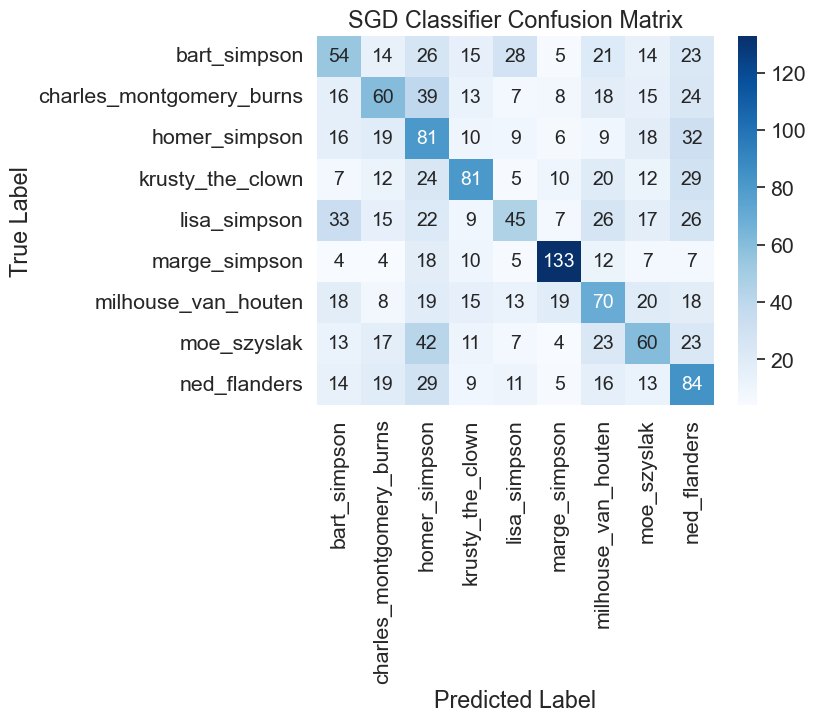

In [250]:
import seaborn as sn

sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 14}, 
           xticklabels= class_names, yticklabels= class_names)

plt.title('SGD Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [252]:
accuracy_SGD = accuracy_score(labels_test, image_pred)

# Print the accuracy
print("Accuracy:", accuracy_SGD)

Accuracy: 0.3711111111111111


In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

### Support Vector Machine (SVM)

In [157]:
from sklearn import svm

classifier = svm.SVC(kernel="linear", C=0.01).fit(image_train_flat, labels_train)

np.set_printoptions(precision=2)

In [290]:
SVM_pred = classifier.predict(image_test_flat)

In [70]:
from sklearn.metrics import precision_score, recall_score

precision_score(labels_train, image_train_pred, average = 'weighted')

0.373498851221479

In [74]:
recall_score(labels_train, image_train_pred, average = 'micro')

0.36777777777777776

In [291]:
accuracy_SVM = accuracy_score(labels_test, SVM_pred)

# Print the accuracy
print("Accuracy:", accuracy_SVM)

Accuracy: 0.0


In [103]:
print(len(image_test))

1800


### Random Forest (RF)

In [121]:
# Resize all images to the same dimensions
image_train_resized = [np.asarray(image.resize((64, 64))) for image in image_train]
image_test_resized = [np.asarray(image.resize((64, 64))) for image in image_test]

# Flatten the image data into a 1D array
image_train_flat = np.array([image.flatten() for image in image_train_resized])
image_test_flat = np.array([image.flatten() for image in image_test_resized])

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(image_train_flat, labels_train)
y_pred_rf = rnd_clf.predict(image_test_flat)

In [253]:
accuracy_RF = accuracy_score(labels_test, y_pred_rf)
print('Accuracy:', accuracy_RF)

Accuracy: 0.0


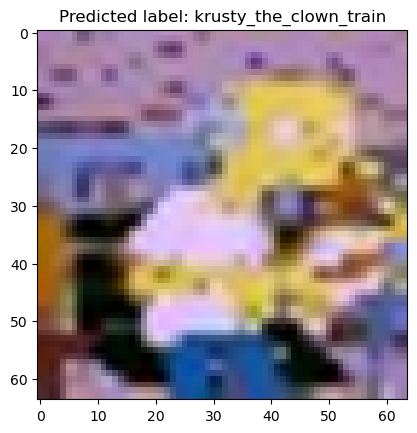

In [127]:
plt.imshow(image_test[500])

# Display the predicted label for the first image
plt.title('Predicted label: ' + y_pred_rf[500])

plt.show()

In [128]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(image_train_flat, labels_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 400}
Best score:  0.5705555555555556


In [254]:
RF_clf = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 400)

In [255]:
RF_clf.fit(image_train_flat, labels_train)

RandomForestClassifier(max_depth=10, n_estimators=400)

In [256]:
RF_clf_pred = RF_clf.predict(image_test_flat)

In [257]:
accuracy_RFT = accuracy_score(labels_test, RF_clf_pred)
print('Accuracy:', accuracy_RFT)

Accuracy: 0.0


### Naive Bayes (NB)

In [259]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()

NB_clf.fit(image_train_flat, labels_train)

GaussianNB()

In [317]:
NB_clf_pred = NB_clf.predict(image_test_flat)

accuracy_NB = NB_clf.score(labels_test, NB_clf_pred)
print("Accuracy:", accuracy_NB)

ValueError: Expected 2D array, got 1D array instead:
array=['bart_simpson_test' 'bart_simpson_test' 'bart_simpson_test' ...
 'ned_flanders_test' 'ned_flanders_test' 'ned_flanders_test'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [263]:
NB_para_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# perform grid search with cross-validation
grid_search = GridSearchCV(NB_clf, NB_para_grid, cv=5)
grid_search.fit(image_train_flat, labels_train)

# print the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Best accuracy: 0.3488888888888889


In [316]:
NB_clf_tune = GaussianNB(var_smoothing = 1e-09)

NB_clf_tune.fit(image_train_flat, labels_train)

NB_clf_tune_pred = NB_clf_tune.predict(image_test_flat)

accuracy_NB_tune = NB_clf_tune.score(labels_test, NB_clf_tune_pred)
print("Accuracy:", accuracy_NB_tune)

ValueError: Expected 2D array, got 1D array instead:
array=['bart_simpson_test' 'bart_simpson_test' 'bart_simpson_test' ...
 'ned_flanders_test' 'ned_flanders_test' 'ned_flanders_test'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Multilayer Perceptron Classifier (MLP)

In [301]:
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier(random_state=1, max_iter=300)

MLP_clf.fit(image_train_flat, labels_train)

MLP_pred = MLP_clf.predict(image_test_flat)

In [304]:
labels_test

array(['bart_simpson_test', 'bart_simpson_test', 'bart_simpson_test', ...,
       'ned_flanders_test', 'ned_flanders_test', 'ned_flanders_test'],
      dtype='<U29')

In [307]:
labels_test = labels_test.reshape(-1, 1)

accuracy_MLP = MLP_clf.score(labels_test, MLP_pred)
print("Accuracy:", accuracy_MLP)

C:\Users\carra\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

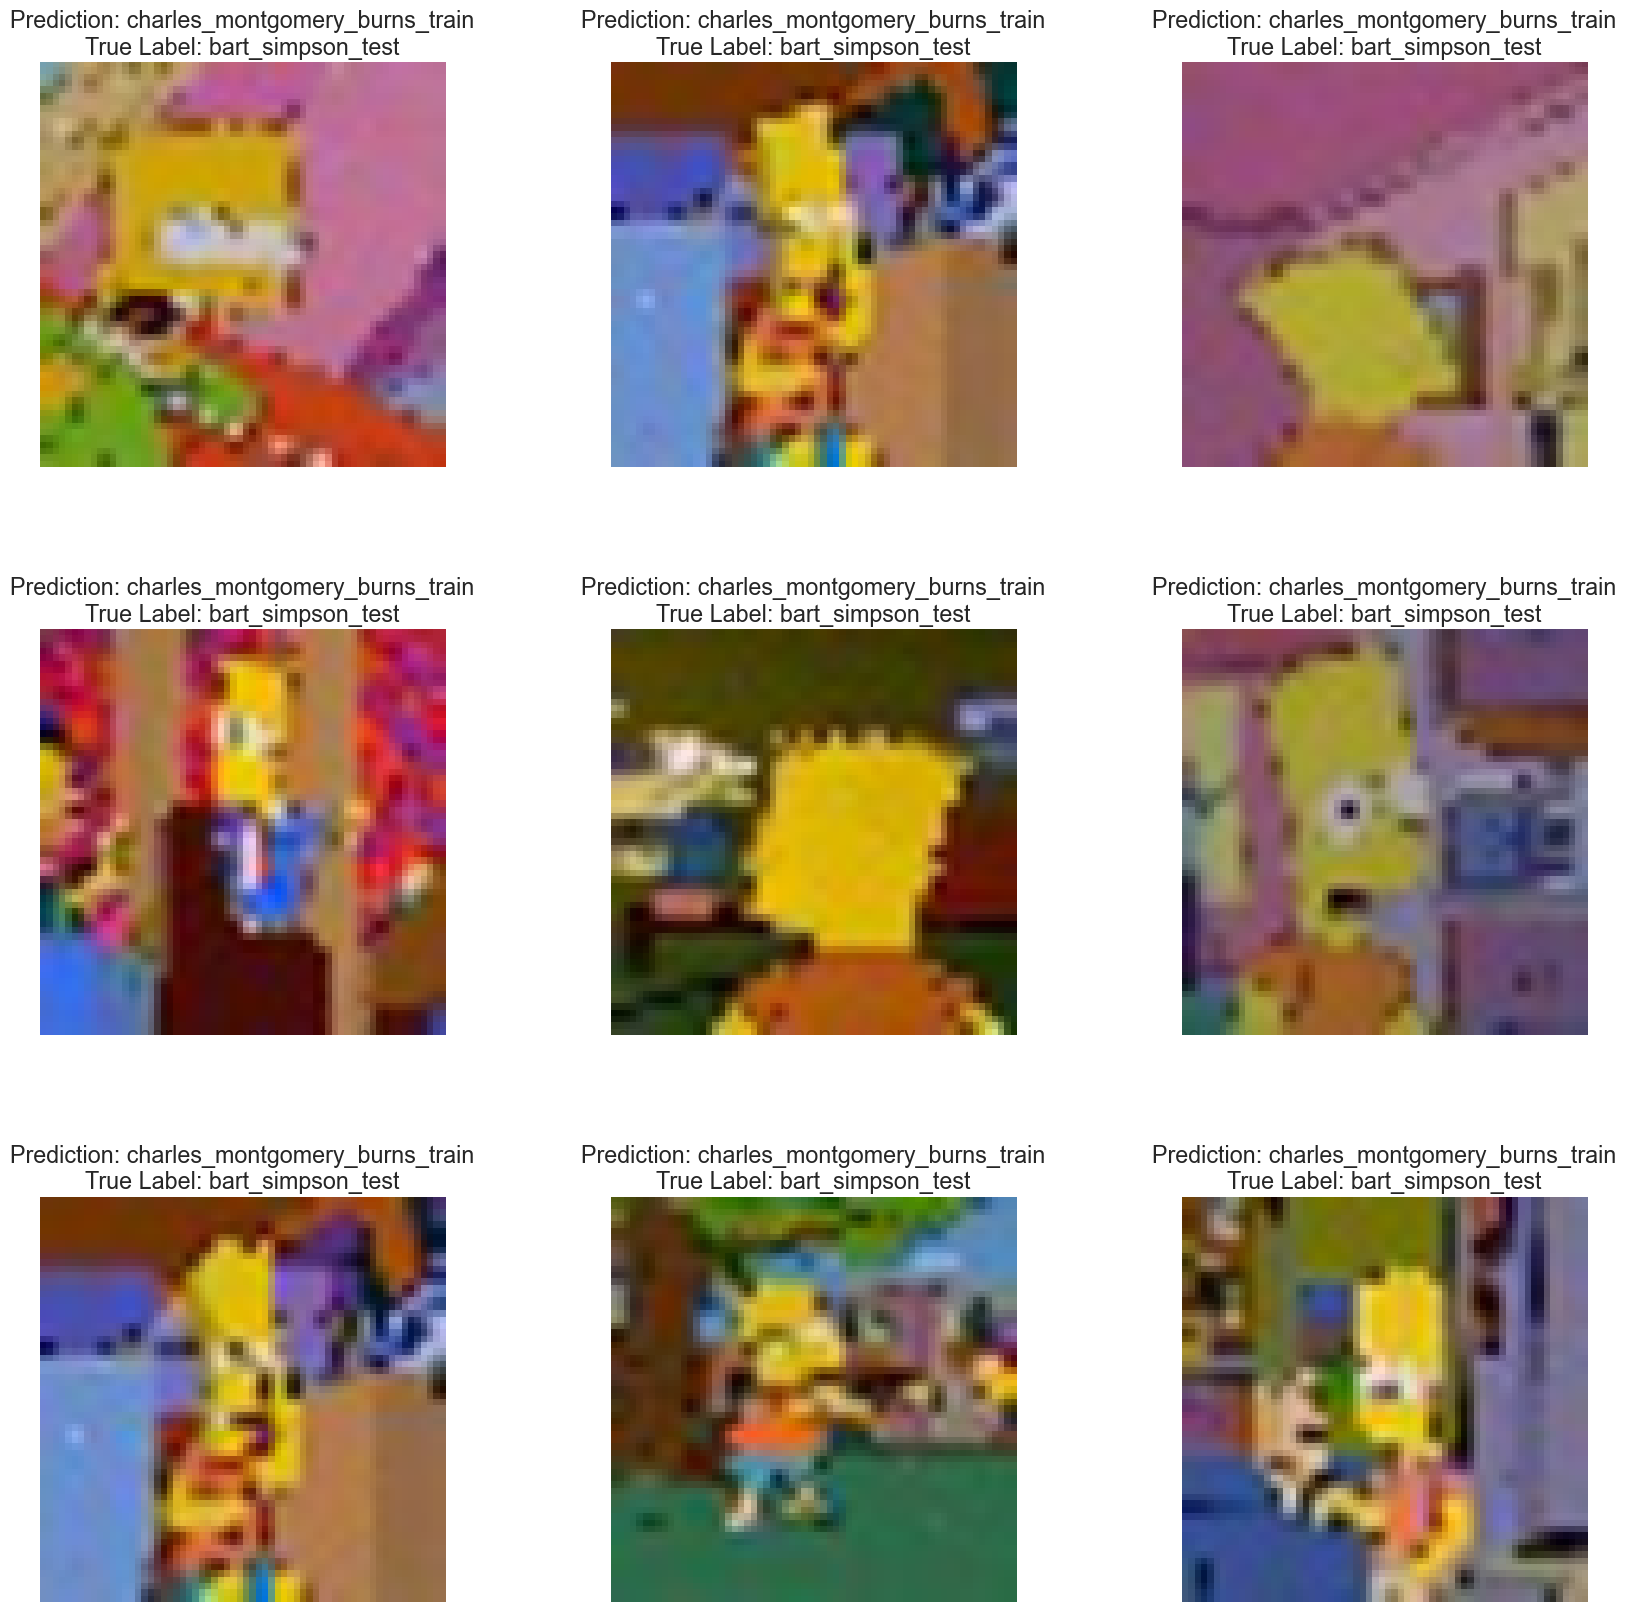

In [299]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axs.flat):
    ax.imshow(image_test[i])
    ax.set_title(f"Prediction: {MLP_pred[i]}\nTrue Label: {labels_test[i]}")
    ax.axis('off')

plt.show()

# Shortlisted Models
## Attempts to improve accuracy with gray scale

### KNN

In [273]:
imageG_train_flat = np.array([np.asarray(image).flatten() for image in imageG_train])
imageG_test_flat = np.array([np.asarray(image).flatten() for image in imageG_test])

In [287]:
KNN_G_clf = KNeighborsClassifier(n_neighbors=1)

KNN_G_clf.fit(imageG_train_flat, labelG_train)

pred_KNN_G = KNN_G_clf.predict(imageG_test_flat)

acc_KNN_G = accuracy_score(labelG_test, pred_KNN_G)

# Print the accuracy
print("Accuracy:", acc_KNN_G)

Accuracy: 0.0


C:\Users\carra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


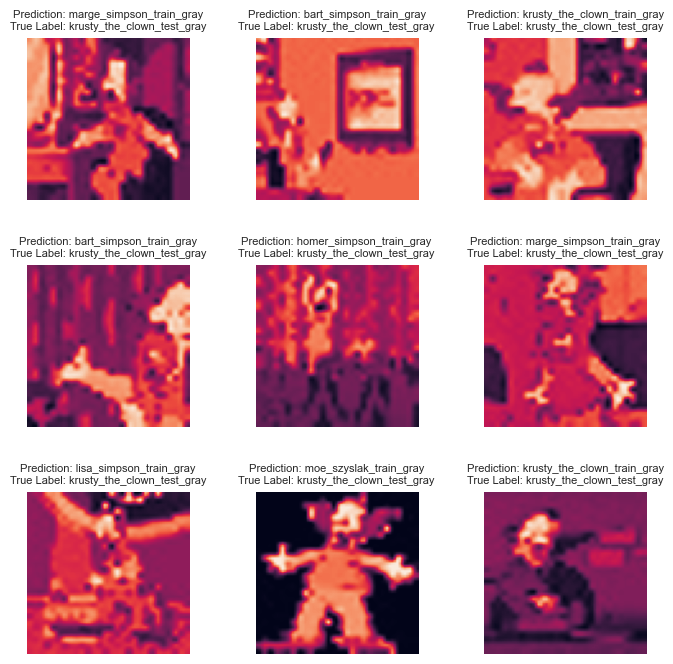

In [349]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axs.flat):
    ax.imshow(imageG_test[i])
    ax.set_title(f"Prediction: {pred_KNN_G[i]}\nTrue Label: {labelG_test[i]}", fontsize = 8)
    ax.axis('off')

plt.show()

# SGD

In [288]:
SGD_clf_gray = SGDClassifier(random_state=42)
SGD_clf_gray.fit(imageG_train_flat, labelG_train)

SGD_pred_Gray = SGD_clf_gray.predict(imageG_test_flat)

SGD_pred_Gray = cross_val_predict(SGD_clf_gray, imageG_test_flat, labelG_test, cv=3)

In [289]:
acc_SGD_gray = accuracy_score(labelG_test, SGD_pred_Gray)

# Print the accuracy
print("Accuracy:", acc_SGD_gray)

Accuracy: 0.2307142857142857


## SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1]}

SVM_clf = SVC()

grid_search = GridSearchCV(SVM_clf, param_grid, cv=5)
grid_search.fit(imageG_train_flat, labelG_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Validation score: ", grid_search.best_score_)

In [ ]:
SVM_pred = grid_search.predict(imageG_train_flat)
accuracy = accuracy_score(labelG_test, SVM_pred)
print("Test accuracy: ", accuracy)

# Thank you for viewing!